<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial103_DL_terminology_data_augmentation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/_bahDWWufCc

**Understanding deep learning terminology**

This code can be used to explain data augmentation.



**cifar10 dataset**

60,000 32×32 pixel images divided into 10 classes.

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.style.use('classic')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop



In [ ]:
# Input data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("The size of training dataset X is: ", X_train.shape)
print("The size of testing dataset X is: ", X_test.shape)

print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_test.shape)

The size of training dataset X is:  (50000, 32, 32, 3)
The size of testing dataset X is:  (10000, 32, 32, 3)
The size of training dataset y is:  (50000, 1)
The size of testing dataset y is:  (10000, 1)


In [ ]:
#Decrease the dataset size to see the effect - decrease it to 1000 (test_size=0.1)
from sklearn.model_selection import train_test_split
_, X, _, Y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print("The size of the dataset X is: ", X.shape)
print("The size of the dataset Y is: ", Y.shape)


The size of the dataset X is:  (10000, 32, 32, 3)
The size of the dataset Y is:  (10000, 1)


In [ ]:
#Split again into train and test to create small training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_test.shape)
print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_test.shape)

The size of training dataset is:  (7500, 32, 32, 3)
The size of testing dataset is:  (2500, 32, 32, 3)
The size of training dataset y is:  (7500, 1)
The size of testing dataset y is:  (2500, 1)


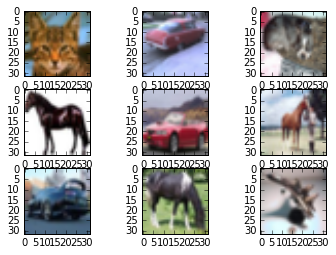

In [ ]:
#view few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [ ]:
X_train = (X_train.astype('float32')) / 255.
X_test = (X_test.astype('float32')) / 255.


In [ ]:
# Print a few y_train values to see before and after categorical
print(y_train[0])
print(y_train[1])
print(y_train[10])

[3]
[1]
[5]


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[0])
print(y_train[1])
print(y_train[10])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Create a model with dropout
drop=0.25

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(10, activation='softmax'))

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = RMSprop(lr=0.001, decay=1e-6)
model1.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
#########################################################
#Fit model without augmentation ....

#history = model1.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)




In [ ]:
###################################################
######### Data augmentation to improve the model

train_datagen = ImageDataGenerator(rotation_range=15,  #Too much rotation may hurt accuracy, especially for small datasets.
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.1,
    vertical_flip=False,
    horizontal_flip = True,
    fill_mode="reflect")

#train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)  #images to generate in a batch



In [ ]:
x = train_generator.next()
print(x[0].shape)  #Images
print(x[1].shape)  #Labels
print((x[0].shape[0]))

(32, 32, 32, 3)
(32, 10)
32


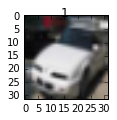

In [ ]:
x = train_generator.next()
image = x[0][0]
title = np.argmax(x[1][0])
plt.figure(figsize=(1.5, 1.5))
plt.suptitle(title, fontsize=12)
plt.imshow(image)
plt.show()
#0: airplane , 1: automobile, 2: bird, 3: cat, 4: deer, 5: dog, 6: frog, 7: horse, 8: ship, 9: truck

In [ ]:
print("Total number of training images in the dataset = ", X_train.shape[0])

Total number of training images in the dataset =  7500


In [ ]:
#NOTE: When we use fit_generator, the number of samples processed 
#for each epoch is batch_size * steps_per_epochs. 
#should typically be equal to the number of unique samples in our 
#dataset divided by the batch size.

batch_size = 32   #Match this to the batch_size from generator
steps_per_epoch = len(X_train) // batch_size  

print("Steps per epoch = ", steps_per_epoch)
print("Total data per epoch = ", steps_per_epoch*batch_size)


Steps per epoch =  234
Total data per epoch =  7488


In [ ]:

#Train using model.fit (older versions of keras, use model.fit_generator)
"""
history1 = model1.fit(
        train_generator,
        steps_per_epoch = steps_per_epoch,
        epochs = 50,
        validation_data = validation_generator,
        validation_steps=val_steps_per_epoch)
"""

history = model1.fit(
        train_generator,
        steps_per_epoch = steps_per_epoch,
        epochs = 50,
        validation_data = (X_test, y_test))



Epoch 1/50
234/234 [==============================] - 8s 20ms/step - loss: 2.4036 - accuracy: 0.1270 - val_loss: 2.0274 - val_accuracy: 0.2620
Epoch 2/50
234/234 [==============================] - 4s 19ms/step - loss: 2.0313 - accuracy: 0.2460 - val_loss: 1.9080 - val_accuracy: 0.3264
Epoch 3/50
234/234 [==============================] - 4s 18ms/step - loss: 1.9150 - accuracy: 0.3043 - val_loss: 1.7569 - val_accuracy: 0.3652
Epoch 4/50
234/234 [==============================] - 4s 18ms/step - loss: 1.8216 - accuracy: 0.3280 - val_loss: 1.7305 - val_accuracy: 0.3556
Epoch 5/50
234/234 [==============================] - 4s 19ms/step - loss: 1.7524 - accuracy: 0.3564 - val_loss: 1.6120 - val_accuracy: 0.4128
Epoch 6/50
234/234 [==============================] - 4s 18ms/step - loss: 1.6882 - accuracy: 0.3783 - val_loss: 1.6090 - val_accuracy: 0.4140
Epoch 7/50
234/234 [==============================] - 4s 18ms/step - loss: 1.6792 - accuracy: 0.3788 - val_loss: 1.6055 - val_accuracy: 0.4200

In [ ]:
_, acc = model1.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

79/79 [==============================] - 0s 3ms/step - loss: 1.0891 - accuracy: 0.6200
Accuracy =  62.00000047683716 %


<bound method NDFrame.head of    num_images  without_aug  with_aug
0        1000         36.4      44.0
1        2000         45.2      48.4
2        5000         51.7      54.7
3       10000         58.4      60.8
4       25000         69.4      70.7
5       50000         77.3      78.4>


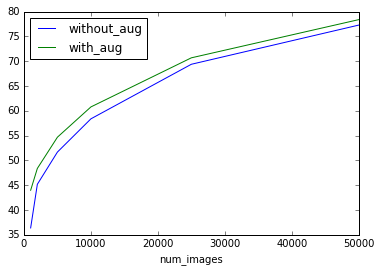

In [ ]:
#Accuracy with and without Augmentation
import pandas as pd
without_aug = {1000:36.4, 2000:45.2, 5000:51.7, 10000:58.4, 25000:69.4, 50000:77.3}
with_aug = {1000:44, 2000:48.4, 5000:54.7, 10000:60.8, 25000:70.7, 50000:78.4}
df = pd.DataFrame([without_aug, with_aug])
df = df.T
df.reset_index(inplace=True)


df.columns =['num_images', 'without_aug', 'with_aug']
print(df.head)

df.plot(x='num_images', y=['without_aug', 'with_aug'], kind='line')


Number of images correspond to the toal images including training and validation. 


Without augmentation and 50 epochs:

- Accuracy with 1000 images: 36.4%
- Accuracy with 2000 images: 45.2%
- Accuracy with 5000 images: 51.7%
- Accuracy with 10000 images: 58.4%
- Accuracy with 25000 images: 69.4%
- Accuracy with 50000 images: 77.3%

With augmentation and 50 epochs:

- Accuracy with 1000 images: 44.0%
- Accuracy with 2000 images: 48.4%
- Accuracy with 5000 images: 54.7%
- Accuracy with 10000 images: 60.8%
- Accuracy with 25000 images: 70.7%
- Accuracy with 50000 images: 78.4%

If your accuracy from augmentation is worse compared to without augmentation, it means your augmentation is notworking out for you. You need to tweak it, for example by limiting rotation or changing fill mode, etc. 

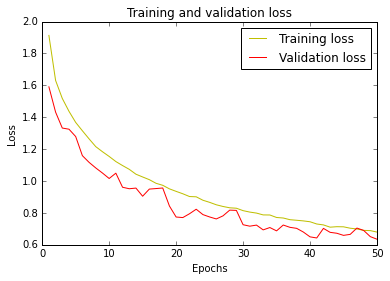

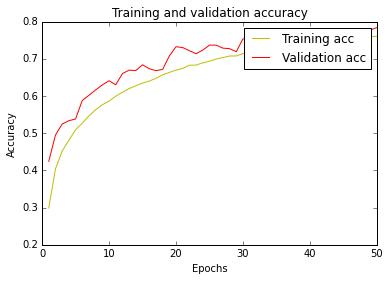

In [ ]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 

history = history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




